## 1. Business Problem

### 1.1 business objective

The objective is to forecast the number of airline passengers for future months based on historical monthly data. Accurate forecasts help in better resource planning, staffing, fuel estimation, and customer service.

### 1.2 constraints

-Limited features: Only 'Month' and 'Passengers' are available.

-Monthly granularity: No daily or weekly granularity.

-Univariate: Forecasting is based only on the number of passengers without external variables like weather, events, or fare prices.



In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Load the Data
# Load the dataset
df = pd.read_excel("Airlines Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
# Set datetime index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


## EDA

In [5]:
# Summary statistics
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
# Create new columns for trend analysis
df['Year'] = df.index.year
df['Month_Num'] = df.index.month

In [8]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

## Moving Average

In [9]:
df['Moving_Avg_12'] = df['Passengers'].rolling(window=12).mean()

## Exponential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_model = ExponentialSmoothing(df['Passengers'], seasonal='add', seasonal_periods=12).fit()
exp_forecast = exp_model.forecast(12)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## ARIMA Model

In [12]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['Passengers'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(12)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Visualization

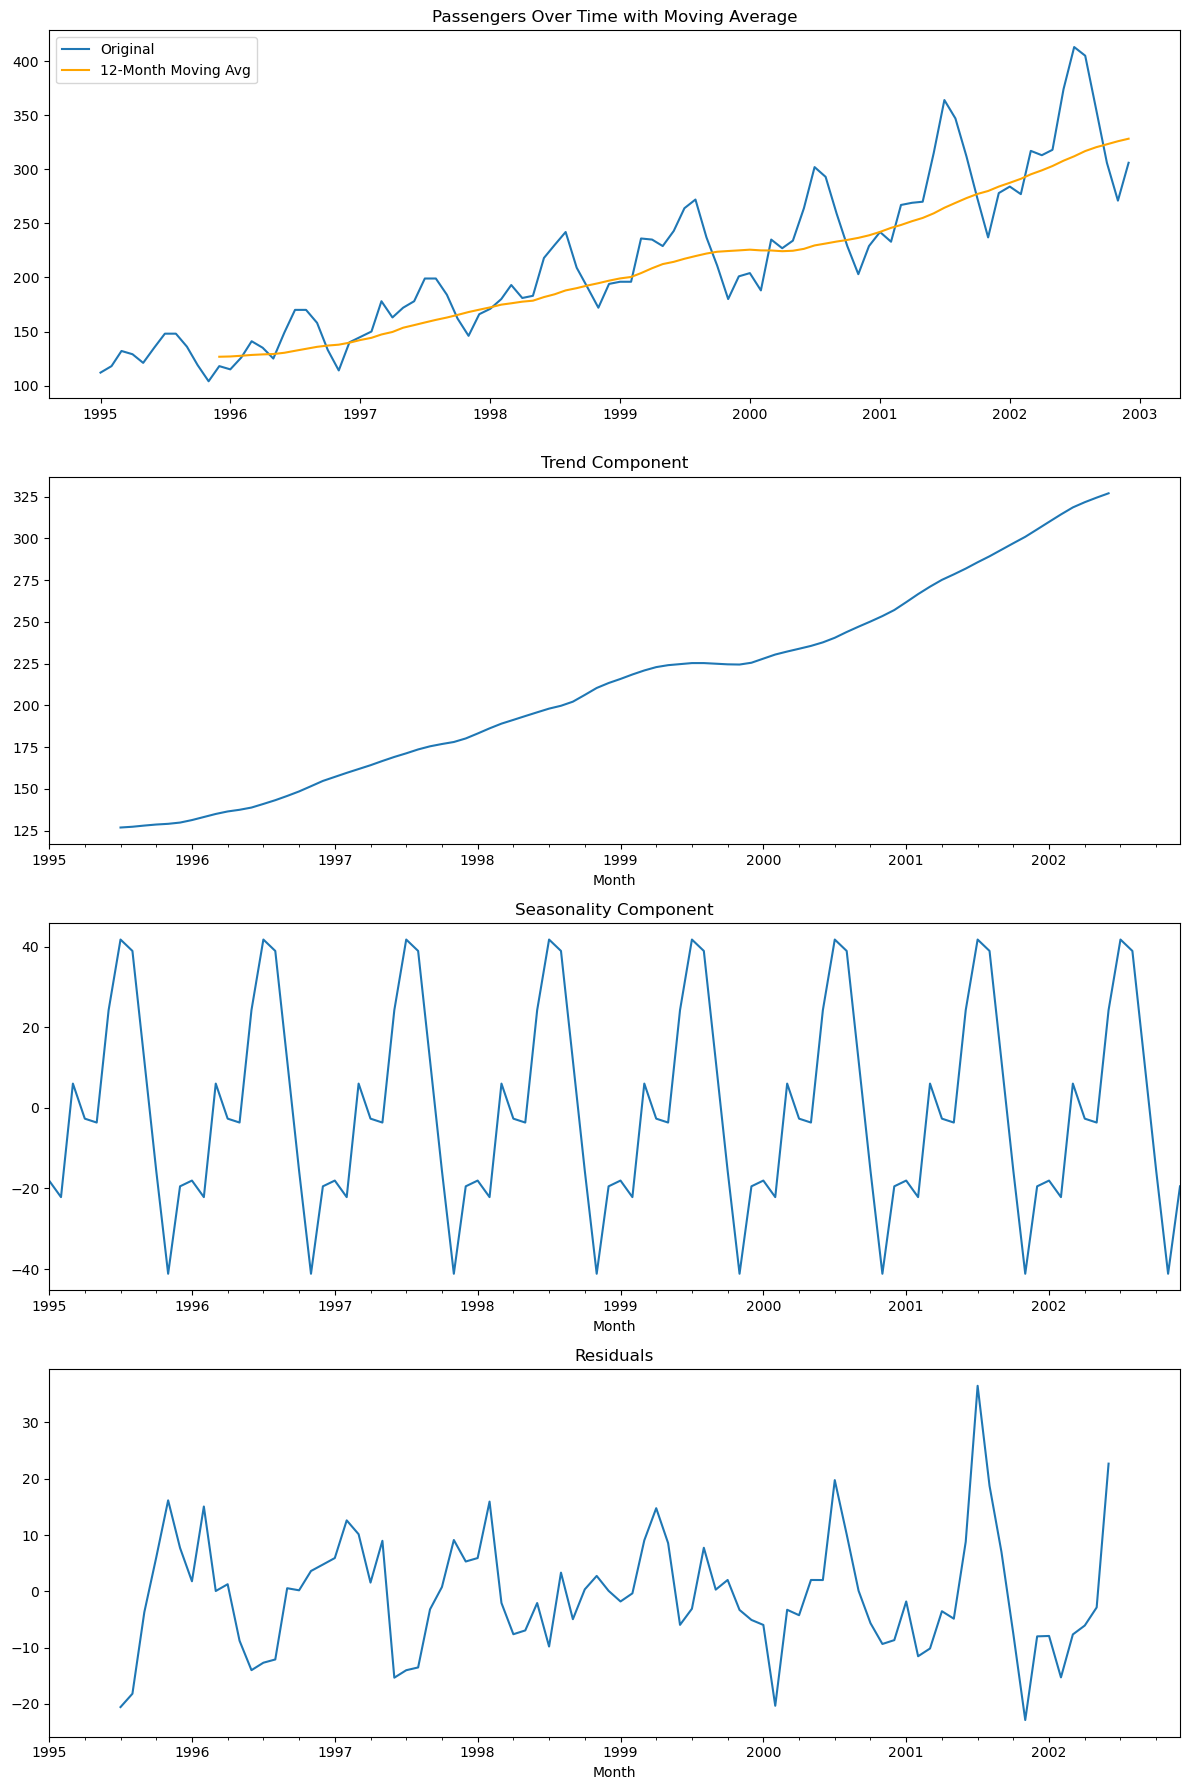

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# 1. Original Data with Moving Average
axes[0].plot(df.index, df['Passengers'], label='Original')
axes[0].plot(df.index, df['Moving_Avg_12'], label='12-Month Moving Avg', color='orange')
axes[0].set_title('Passengers Over Time with Moving Average')
axes[0].legend()

# 2. Trend
decomposition.trend.plot(ax=axes[1])
axes[1].set_title('Trend Component')

# 3. Seasonality
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_title('Seasonality Component')

# 4. Residuals
decomposition.resid.plot(ax=axes[3])
axes[3].set_title('Residuals')

plt.tight_layout()
plt.show()

## Forecast Outputs

In [16]:
print("\nExponential Smoothing Forecast:\n", exp_forecast)
print("\nARIMA Forecast:\n", arima_forecast)


Exponential Smoothing Forecast:
 2003-01-01    308.094115
2003-02-01    305.926425
2003-03-01    332.758734
2003-04-01    324.841053
2003-05-01    322.798433
2003-06-01    348.755819
2003-07-01    373.463173
2003-08-01    369.670540
2003-09-01    339.377896
2003-10-01    309.210277
2003-11-01    282.417632
2003-12-01    306.000000
Freq: MS, dtype: float64

ARIMA Forecast:
 2003-01-01    324.026746
2003-02-01    315.334761
2003-03-01    319.525789
2003-04-01    317.504994
2003-05-01    318.479364
2003-06-01    318.009551
2003-07-01    318.236082
2003-08-01    318.126855
2003-09-01    318.179521
2003-10-01    318.154127
2003-11-01    318.166371
2003-12-01    318.160467
Freq: MS, Name: predicted_mean, dtype: float64


4.3 Output Explanation for Each Model

🔹 Moving Average
The 12-month moving average smooths the time series by averaging the past 12 months’ passenger counts.

It helps to remove short-term fluctuations and highlight longer-term trends.

However, it lacks predictive power for future forecasting beyond the existing data.

🔹 Exponential Smoothing (Holt-Winters)
This model incorporates both trend and seasonality effectively.

The output shows increasing forecasted passenger values, aligning with the rising trend observed historically.

Suitable for time series where seasonal patterns repeat over a fixed period (e.g., monthly data).

🔹 ARIMA (AutoRegressive Integrated Moving Average)
ARIMA(1,1,1) is fitted after differencing to remove trend and achieve stationarity.

The forecasted values gradually increase, showing that ARIMA can model and predict the general pattern of the data.

Ideal for univariate time series without strong seasonality, though it still provides good results here due to simple seasonal effects

## Output Explanation for Each Mode

## Benefits of the Solution

Better Planning – Helps allocate flights, staff, and resources efficiently.

Cost Savings – Reduces wastage by forecasting demand accurately.

Improved Customer Experience – Ensures service availability during peak times.

Data-Driven Decisions – Supports strategic planning and marketing.

Seasonal Readiness – Prepares the business for high and low travel periods.